In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
#read the dataset

data = pd.read_csv(r'C:\Users\rajvi\OneDrive\Data Mentorship Program\Social Media\Nov2022\GlobalLandTemperatures.csv', parse_dates=['dt'])

In [147]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [148]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [150]:
##CheckingTheMissingValues

data.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [151]:
##Finding the mode 

avgtempmode = data.AverageTemperature.mode()[0]
data.AverageTemperature.fillna(avgtempmode, inplace = True)
avgtempmodeuncertainity = data.AverageTemperatureUncertainty.mode()[0]
data.AverageTemperatureUncertainty.fillna(avgtempmodeuncertainity, inplace = True)

In [152]:
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [153]:
##Selecting Subset by year

##Separting year from date time

data['Year'] = pd.DatetimeIndex(data['dt']).year
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
1,1743-12-01,26.864,0.283,Åland,1743
2,1744-01-01,26.864,0.283,Åland,1744
3,1744-02-01,26.864,0.283,Åland,1744
4,1744-03-01,26.864,0.283,Åland,1744


In [154]:
# Delete Rows by Checking Conditions
data = pd.DataFrame(data)
data1 = data.loc[data["Year"] >=1980 ]
print(data1)

               dt  AverageTemperature  AverageTemperatureUncertainty  \
2834   1980-01-01              -4.073                          0.518   
2835   1980-02-01              -6.484                          0.441   
2836   1980-03-01              -3.947                          0.466   
2837   1980-04-01               2.928                          0.597   
2838   1980-05-01               6.154                          0.241   
...           ...                 ...                            ...   
577457 2013-05-01              19.059                          1.022   
577458 2013-06-01              17.613                          0.473   
577459 2013-07-01              17.000                          0.453   
577460 2013-08-01              19.759                          0.717   
577461 2013-09-01              26.864                          0.283   

         Country  Year  
2834       Åland  1980  
2835       Åland  1980  
2836       Åland  1980  
2837       Åland  1980  
2838      

In [155]:
data1 = pd.DataFrame(data1)

In [156]:
data1

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
2834,1980-01-01,-4.073,0.518,Åland,1980
2835,1980-02-01,-6.484,0.441,Åland,1980
2836,1980-03-01,-3.947,0.466,Åland,1980
2837,1980-04-01,2.928,0.597,Åland,1980
2838,1980-05-01,6.154,0.241,Åland,1980
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013
577458,2013-06-01,17.613,0.473,Zimbabwe,2013
577459,2013-07-01,17.000,0.453,Zimbabwe,2013
577460,2013-08-01,19.759,0.717,Zimbabwe,2013


In [170]:
data1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
2834,1980-01-01,-4.073,0.518,Åland,1980
2835,1980-02-01,-6.484,0.441,Åland,1980
2836,1980-03-01,-3.947,0.466,Åland,1980
2837,1980-04-01,2.928,0.597,Åland,1980
2838,1980-05-01,6.154,0.241,Åland,1980


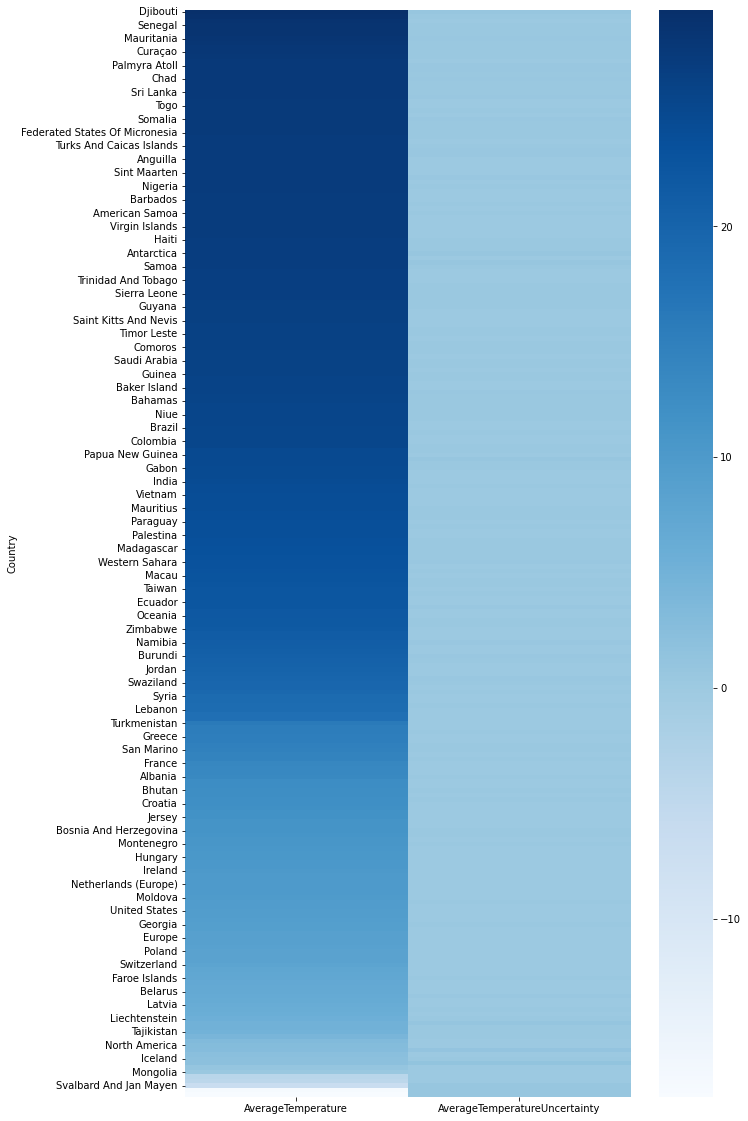

In [171]:
##Sorting Values and regraphing

pivot = data1.pivot_table(index=['Country'],values=['AverageTemperature','AverageTemperatureUncertainty'],aggfunc='mean').sort_values(by=['AverageTemperature','AverageTemperatureUncertainty'],ascending=False)
fig,ax=plt.subplots(figsize=(10,20))
sns.heatmap(pivot,cmap="Blues",ax=ax)
plt.show()

In [173]:
datayear = data1.groupby(["Year","Country"], sort=True)["AverageTemperature"].sum()

In [174]:
datayear = pd.DataFrame(datayear)

In [175]:
datayear

AverageTemperature
Year Country                           
1980 Afghanistan                178.648
     Africa                     293.360
     Albania                    145.945
     Algeria                    277.922
     American Samoa             323.889
...                                 ...
2013 Western Sahara             216.818
     Yemen                      251.902
     Zambia                     196.432
     Zimbabwe                   192.550
     Åland                       76.702

[8262 rows x 1 columns]

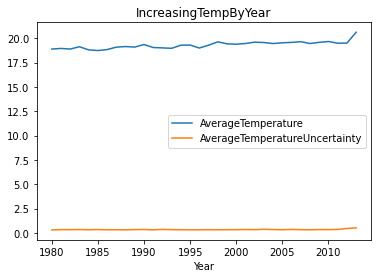

In [176]:
TempByYear = data1.groupby('Year').mean()
plotbyTemp = TempByYear.plot(title = 'IncreasingTempByYear')